# Imports

In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import datetime
import os, sys
import time
import pandas as pd

from matplotlib.pyplot import imshow, imsave
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import shutil

from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Capstone thesis Anahit/GANS - implementations/GANs/collect_into_one_architecture/'
gdrive_path='/content/gdrive/MyDrive/GANs/collect_into_one_architecture'

drive.mount('/content/gdrive', force_remount=True)
os.chdir(gdrive_path)
print(sorted(os.listdir()))


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/gdrive
['Changing_betas.ipynb', 'Changing_clip_values.ipynb', 'Changing_disc_iter.ipynb', 'Changing_learning_rates.ipynb', 'Result-Plots.ipynb', 'Training_best_params.ipynb', '__pycache__', 'data', 'files', 'functions.py', 'generated_images', 'real_images', 'results']


In [2]:
from functions import *

In [3]:
values = pd.read_csv("files/values_of_some_hyperparams.csv")
values

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,model_name,n_noise,batch_size,n_critic,max_epochs,clip_value,best_lr,best_beta
0,0,0,0,0,WGAN,100,128,1,35,0.01,0.001,0.9
1,1,1,1,1,WGAN_GP,100,128,2,33,NaN,0.001,0.9
2,2,2,2,2,LSGAN,100,128,1,20,NaN,0.001,0.9
3,3,3,3,3,Vanilla_GAN,100,128,2,20,NaN,0.001,0.9


In [4]:
import random
random.seed(42) 
clip_values = []
for i in range(5):
    clip_values.append(random.random())
clip_values


[0.6394267984578837,
 0.025010755222666936,
 0.27502931836911926,
 0.22321073814882275,
 0.7364712141640124]

In [5]:
def run(MODEL_NAME, lrs, batch_size, n_critic, max_epoch, clip_value, n_noise, threshold, beta, random_seed = True):
  
  time_to_finish = []
  root1 = f"results/models/clip_value/{MODEL_NAME}/"
  root2 = f"results/imgs/clip_value/{MODEL_NAME}/"
  for i in clip_values:
    start_time = time.time()
    path_model = root1 + "clip_value_" + str(i)
    path_img = root2 + "clip_value_" + str(i)

    if os.path.exists(path_img):
      shutil.rmtree(path_img)
      print(f"Removed {path_img}")
      os.mkdir(path_img)
    else:
      os.mkdir(path_img)
    
    if os.path.exists(path_model):
      shutil.rmtree(path_model)
      print(f"Removed {path_model}")
      os.mkdir(path_model)

    else:
      os.mkdir(path_model)
    print(path_model)
    print(path_img)
    print("*"*30)
    print("\n Training Clip value = ", i, "!")
    if  MODEL_NAME == "WGAN":
      train_WGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, clip_value = clip_value, n_noise = n_noise,
              random_seed = random_seed, threshold = threshold, beta=beta)
    else:
      print("Only WGAN has Clip value")

      
    end_time = time.time()
    print("*"*30)
    time_to_finish.append(end_time - start_time)
  print("RUN TIME: ", time_to_finish)

  result_time = pd.DataFrame()
  result_time["time"] = time_to_finish
  result_time["clip_value"] = clip_values
  result_time["clip_value"] = result_time["clip_value"].astype('str')
  result_time.to_csv(f"results/models/clip_value/{MODEL_NAME}_runing_times.csv")

# GANs Comparative Analysis

# clip_value Analysis

# WGAN

In [6]:
MODEL_NAME = values[values.model_name=="WGAN"].model_name.values[0]
n_noise = values[values.model_name=="WGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN"].clip_value.values[0]
lr = values[values.model_name=="WGAN"].best_lr.values[0]
beta = values[values.model_name=="WGAN"].best_beta.values[0]


In [7]:

# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_values,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = beta)

In [8]:
clip_values = [0.6394267984578837,
 0.025010755222666936,
 0.27502931836911926,
 0.22321073814882275,
 0.7364712141640124]

In [9]:
for clip_value in clip_values:
  print(f"{MODEL_NAME} clip_value = {clip_value}")
  plot_f1_precison_recall(f"results/models/clip_value/{MODEL_NAME}/clip_value_{clip_value}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
  plot_loss(f"results/models/clip_value/{MODEL_NAME}/clip_value_{clip_value}/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")

WGAN clip_value = 0.6394267984578837


WGAN clip_value = 0.025010755222666936


WGAN clip_value = 0.27502931836911926


WGAN clip_value = 0.22321073814882275


WGAN clip_value = 0.7364712141640124


WGAN, clip_value = 0.6394267984578837


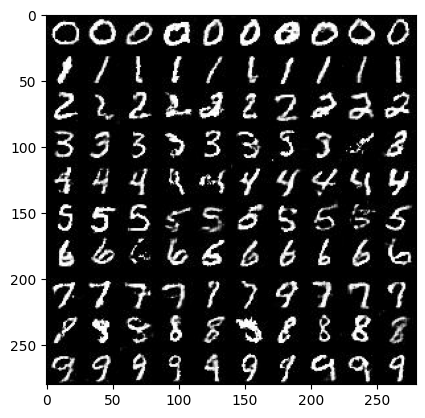

WGAN, clip_value = 0.025010755222666936


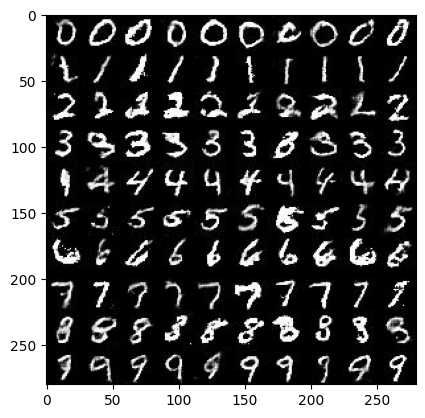

WGAN, clip_value = 0.27502931836911926


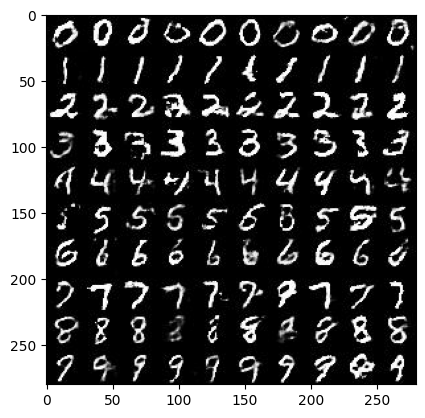

WGAN, clip_value = 0.22321073814882275


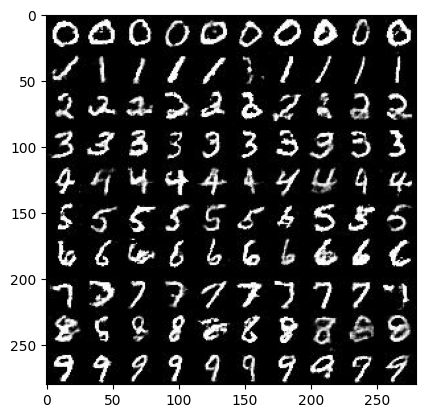

WGAN, clip_value = 0.7364712141640124


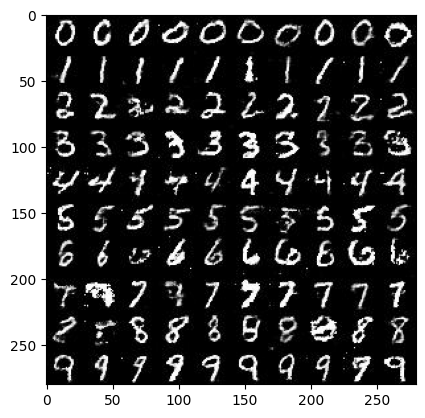

In [10]:
MODEL_NAME = "WGAN"
for clip_value in clip_values:
  print(f"{MODEL_NAME}, clip_value = {clip_value}")
  path = f"results/imgs/clip_value/{MODEL_NAME}/clip_value_{clip_value}/{MODEL_NAME}_last.jpg"
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()

# FID SCORE

## WGAN

In [11]:
MODEL_NAME = "WGAN"
for clip_value in clip_values:
  path = f"generated_images/clip_value/{MODEL_NAME}/"
  add = "clip_value_" + str(clip_value)
  path = path + add
  model_path = f"results/models/clip_value/{MODEL_NAME}/" + add
  # print(model_path)
  if os.path.exists(path):
      shutil.rmtree(path)
      # print(f"removed {path}")
  os.mkdir(path)
  # print(f"created {path}")

  for digit in range(0,10):
    digit = str(digit)
    Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [13]:
fid_scores = []
for clip_value in clip_values:
  path = f"generated_images/clip_value/{MODEL_NAME}/"
  add = "clip_value_" + str(clip_value)
  path = path + add
  print(path)
  real_images_path = "real_images"
  generated_images_path = path
  batch_size = 20
  fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
  print(f"FID score: {fid}")
  fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["clip_value"] = clip_values
fid_df.to_csv(f"results/models/clip_value/{MODEL_NAME}_FID_scores_vs_clip_value.csv")
fid_df

generated_images/clip_value/WGAN/clip_value_0.6394267984578837


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 276MB/s] 


FID score: 84.63506650856414
generated_images/clip_value/WGAN/clip_value_0.025010755222666936
FID score: 91.48249134956342
generated_images/clip_value/WGAN/clip_value_0.27502931836911926
FID score: 73.75020071811596
generated_images/clip_value/WGAN/clip_value_0.22321073814882275
FID score: 77.30627745687985
generated_images/clip_value/WGAN/clip_value_0.7364712141640124
FID score: 79.04180951997049


,fid_score,model_name,clip_value
0,84.635067,WGAN,0.639427
1,91.482491,WGAN,0.025011
2,73.750201,WGAN,0.275029
3,77.306277,WGAN,0.223211
4,79.041810,WGAN,0.736471


# clip_value VS Loss

### WGAN 


In [15]:
MODEL_NAME = "WGAN"
trained_clip_values = os.listdir(f"results/models/clip_value/{MODEL_NAME}/")
root = f"results/models/clip_value/{MODEL_NAME}/"
G_loss_list = []
D_loss_list = []


for trained_clip_value, clip_value in zip(trained_clip_values, clip_values):
  print(clip_value)
  path = root + trained_clip_value + "/"

  G_loss, D_loss = load_model(path, clip_value, n_noise)
  G_loss_list.append(G_loss.item())
  D_loss_list.append(D_loss.item())

  print("D = ",D_loss.item(), "G = ",G_loss.item())


0.6394267984578837
D =  2.586841583251953e-05 G =  1.2070722579956055
0.025010755222666936
D =  0.0006170272827148438 G =  9.03645133972168
0.27502931836911926
D =  0.0024276375770568848 G =  -0.708919107913971
0.22321073814882275
D =  -0.00030994415283203125 G =  14.79940414428711
0.7364712141640124
D =  -12.630279541015625 G =  -311.39990234375


In [16]:
result_loss = pd.DataFrame()
result_loss["D_loss"] = D_loss_list
result_loss["G_loss"] = G_loss_list
result_loss["clip_value"] = clip_values
result_loss["clip_value"] = result_loss["clip_value"].astype('str')
result_loss['size'] = 5
result_loss.to_csv(f"results/models/clip_value/{MODEL_NAME}_loss_values.csv")
result_loss

,D_loss,G_loss,clip_value,size
0,0.000026,1.207072,0.6394267984578837,5
1,0.000617,9.036451,0.025010755222666936,5
2,0.002428,-0.708919,0.27502931836911926,5
3,-0.000310,14.799404,0.22321073814882275,5
4,-12.630280,-311.399902,0.7364712141640124,5


In [17]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(px.scatter(result_loss, x="clip_value", y="D_loss",  size="size").data[0], row=1, col=1)
fig.add_trace(px.scatter(result_loss, x="clip_value", y="G_loss",  size="size").data[0], row=1, col=2)
fig.update_layout(title="Loss vs clip_value", 
                  xaxis=dict(title="clip_value"),
                  yaxis=dict(title="Loss"))

fig.show()

In [21]:
result_time = pd.read_csv(f"results/models/clip_value/{MODEL_NAME}_runing_times.csv")
result_time["size"] = 5

FileNotFoundError: ignored

In [ ]:
fig = px.scatter(result_time, x="clip_value", y="time", color="clip_value", size="size", title = "run time vs clip_value")
fig.show()